In [ ]:
#MFB Por la doble realimentacion que presenta el circuito

In [51]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt
import control.matlab as ml
from sympy import factor, symbols, simplify, Poly, apart
import scipy
import math

# Mi transferencia

In [11]:
coeficientes_numerador = [6.317*(10**8), 0, 0]

In [12]:
coeficientes_denominador = [1, 3.554*(10**4), 1.895*(10**9), 2.245*(10**13), 3.99*(10**17)]

# Calculo zeros y polos

In [13]:
#calcular polos
roots_den = np.roots(coeficientes_denominador)
print("Cantidad de polos: {}".format(len(roots_den)))
roots_den = [r.round(2) for r in roots_den]
for r in roots_den:
    print(r)

Cantidad de polos: 4
(-12002.32+34212.9j)
(-12002.32-34212.9j)
(-5767.68+16439.38j)
(-5767.68-16439.38j)


In [14]:
#calcular ceros
roots_num = np.roots(coeficientes_numerador)
print("Cantidad de zeros: {}".format(len(roots_num)))
roots_num = [r.round(2) for r in roots_num]
for r in roots_num:
    print(r)

Cantidad de zeros: 2
0.0
0.0


# Separo transferencia en una multiplicacion de menor orden

In [15]:
s = symbols('s')

In [16]:
eq_den = []
for i in range(len(coeficientes_denominador), 0, -1):
    #print()
    eq_den.append( (s**(i-1)) * coeficientes_denominador[::-1][i-1] )

In [17]:
eq_num = []
for i in range(len(coeficientes_numerador), 0, -1):
    #print()
    eq_num.append( (s**(i-1)) * coeficientes_numerador[::-1][i-1] )

In [18]:
(eq_num[0] + eq_num[1]) / (eq_den[0] + eq_den[1] + eq_den[2] + eq_den[3])

631700000.0*s**2/(s**4 + 35540.0*s**3 + 1895000000.0*s**2 + 22450000000000.0*s)

# Primer pasabajos 2do orden

In [19]:
den_pb_1 = simplify((s-roots_den[0])*(s-roots_den[1]))
coef_pb_1 = Poly(simplify((s-roots_den[0])*(s-roots_den[1]))).coeffs()
num_pb_1 = s * (coef_pb_1[1])
num_pb_1 / den_pb_1

24004.64*s/(1.0*s**2 + 24004.64*s + 1314578211.7924)

In [20]:
alfa1 = coef_pb_1[1]/2
w01 = np.abs(roots_den[0])
Q1 = w01/(2*alfa1)
f01 = w01/(2*math.pi)
print("Alfa1: {}".format(alfa1.round(2)))
print("w01: {}".format(w01.round(2)))
print("f01: {}".format(f01.round(2)))
print("Q1: {}".format(Q1.round(2)))

Alfa1: 12002.32
w01: 36257.11
f01: 5770.5
Q1: 1.51


# Segundo pasabajos segundo orden

In [31]:
den_pb_2 = simplify((s-roots_den[2])*(s-roots_den[3]))
coef_pb_2 = Poly(simplify((s-roots_den[2])*(s-roots_den[3]))).coeffs()
num_pb_2 = s * (coef_pb_2[1])
num_pb_2 / den_pb_2

sympy.core.mul.Mul

In [22]:
alfa2 = coef_pb_2[1]/2
w02 = np.abs(roots_den[2])
Q2 = w02/(2*alfa2)
f02 = w02/(2*math.pi)
print("Alfa2: {}".format(alfa2.round(2)))
print("w02: {}".format(w02.round(2)))
print("f02: {}".format(f02.round(2)))
print("Q2: {}".format(Q2.round(2)))

Alfa2: 5767.68
w02: 17421.81
f02: 2772.77
Q2: 1.51


In [23]:
H0 = (631700000.0/(coef_pb_1[1]*coef_pb_2[1]))
H0.round(2)

2.28

In [24]:
assert (H0*coef_pb_1[1]*coef_pb_2[1]) == coeficientes_numerador[0]

# Diagrama de Bode

In [32]:
G = ctl.tf(coeficientes_numerador, coeficientes_denominador)
G

control.xferfcn.TransferFunction

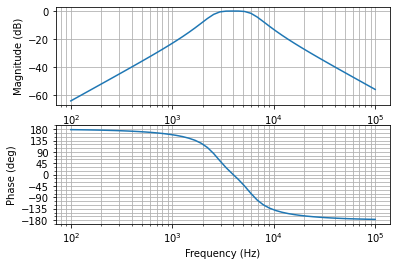

<Figure size 36000x36000 with 0 Axes>

In [18]:
ctl.bode(G, dB=True)
plt.figure(figsize=(500,500))
plt.show()

# Respuesta al escalon

/home/rodrigo/python-virtual-environments/adc/lib/python3.6/site-packages/scipy/sparse/linalg/matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.68406e-24): result may not be accurate.
  return solve(Q, P)


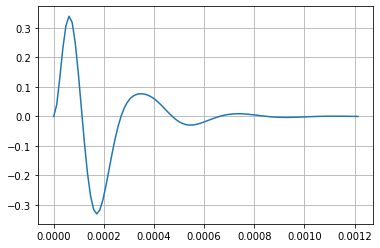

In [19]:
yout, T = ml.step(G)
plt.plot(T,yout)
plt.grid()
plt.show()

# Respuesta al impulso 

/home/rodrigo/python-virtual-environments/adc/lib/python3.6/site-packages/scipy/sparse/linalg/matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.68406e-24): result may not be accurate.
  return solve(Q, P)


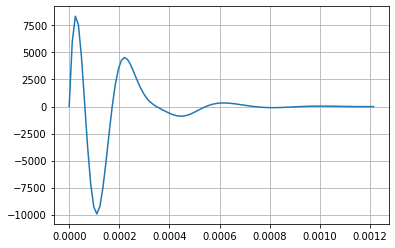

In [20]:
yout, T = ml.impulse(G)
plt.plot(T,yout)
plt.grid()
plt.show()

# Calculo parametros de mi filtro

In [21]:
H_0 = 1
Q = 4.38#Q1
f = 1224#f01
w = 2*(math.pi)*f

In [22]:
C = 47*(10**-9)
assert 1*(10**-9) < C < 1*(10**-6)
print("C: {}".format(C))

C: 4.7000000000000004e-08


In [23]:
R2 = (2*Q)/(C*w)
assert 1*(10**3) < R2 < 1*(10**6), print("{} fuera de rango".format(R2))
print("R2: {}".format(R2))

R2: 24235.10814707626


In [24]:
R1 = R2/(2*H_0)
assert 1*(10**3) < R1 < 1*(10**6), print("{} fuera de rango".format(R1))
print("R1: {}".format(R1))

R1: 12117.55407353813


In [25]:
R3 = R1/(((2*(Q**2))/H_0) - 1)
assert 1*(10**3) < R3 < 1*(10**6), print("{} fuera de rango".format(R3))
print("R3: {}".format(R3))

324.26928543432297 fuera de rango


AssertionError: None

In [116]:
def find_values(H_0, Q, f):
    def valid_r(r_value):
        cota_inferior = 1*(10**3)
        cota_superior = 1*(10**6)
        if cota_inferior < r_value < cota_superior:
            return True
        else:
            return False
        
    def value_R2(_Q, _C, _w):
        _R2 = (2*_Q)/(_C*_w)
        return _R2

    def value_R1(_R2, _H_0):
        _R1 = _R2/(2*_H_0)
        return _R1

    def value_R3(_R1, _Q, _H_0):
        _R3 = R1/(((2*(_Q**2))/H_0) - 1)
        return _R3


    #C = 47*(10**-9)
    w = 2*(math.pi)*f
    results = {}
    cota_inf = 1*(10**-9)
    cota_sup = 1*(10**-6)
    for C in np.arange(cota_inf, cota_sup, cota_inf):    
        R2 = value_R2(Q, C, w)
        R1 = value_R1(R2, H_0)
        R3 = value_R3(R1, Q, H_0)
        if valid_r(R2) and valid_r(R1) and valid_r(R3):
            results[C] = {"R2": R2/1000, "R1":R1/1000, "R3": R3/1000}
            #print("Valid results: {}".format(len(results)))
            
    return results

In [117]:
results = find_values(H_0=1.51, Q=Q1, f=f01)
for k, v in results.items():
    print("{} --> {}".format(k, v))
    print()
    print("++++++++++")
    print()

1e-09 --> {'R2': 83.3172253364349, 'R1': 27.5884852107400, 'R3': 13.6462877078759}

++++++++++

2e-09 --> {'R2': 41.6586126682175, 'R1': 13.7942426053700, 'R3': 6.82314385393795}

++++++++++

3.0000000000000004e-09 --> {'R2': 27.7724084454783, 'R1': 9.19616173691335, 'R3': 4.54876256929197}

++++++++++

4e-09 --> {'R2': 20.8293063341087, 'R1': 6.89712130268501, 'R3': 3.41157192696898}

++++++++++

5e-09 --> {'R2': 16.6634450672870, 'R1': 5.51769704214801, 'R3': 2.72925754157518}

++++++++++

6e-09 --> {'R2': 13.8862042227392, 'R1': 4.59808086845667, 'R3': 2.27438128464598}

++++++++++

7.000000000000001e-09 --> {'R2': 11.9024607623479, 'R1': 3.94121217296286, 'R3': 1.94946967255370}

++++++++++

8e-09 --> {'R2': 10.4146531670544, 'R1': 3.44856065134251, 'R3': 1.70578596348449}

++++++++++

9.000000000000001e-09 --> {'R2': 9.25746948182610, 'R1': 3.06538724563778, 'R3': 1.51625418976399}

++++++++++

1.0000000000000002e-08 --> {'R2': 8.33172253364349, 'R1': 2.75884852107400, 'R3': 1.364

In [119]:
results = find_values(H_0=1.51, Q=Q2, f=f02)
for k, v in results.items():
    print("{} --> {}".format(k, v))
    print()
    print("++++++++++")
    print()

1e-09 --> {'R2': 173.379937860630, 'R1': 57.4105754505398, 'R3': 28.4044332389287}

++++++++++

2e-09 --> {'R2': 86.6899689303151, 'R1': 28.7052877252699, 'R3': 14.2022166194643}

++++++++++

3.0000000000000004e-09 --> {'R2': 57.7933126202101, 'R1': 19.1368584835133, 'R3': 9.46814441297623}

++++++++++

4e-09 --> {'R2': 43.3449844651576, 'R1': 14.3526438626350, 'R3': 7.10110830973217}

++++++++++

5e-09 --> {'R2': 34.6759875721260, 'R1': 11.4821150901080, 'R3': 5.68088664778574}

++++++++++

6e-09 --> {'R2': 28.8966563101050, 'R1': 9.56842924175664, 'R3': 4.73407220648811}

++++++++++

7.000000000000001e-09 --> {'R2': 24.7685625515186, 'R1': 8.20151077864854, 'R3': 4.05777617698981}

++++++++++

8e-09 --> {'R2': 21.6724922325788, 'R1': 7.17632193131748, 'R3': 3.55055415486609}

++++++++++

9.000000000000001e-09 --> {'R2': 19.2644375400700, 'R1': 6.37895282783776, 'R3': 3.15604813765874}

++++++++++

1.0000000000000002e-08 --> {'R2': 17.3379937860630, 'R1': 5.74105754505398, 'R3': 2.840

# Valores normalizados PRIMER FILTRO

In [120]:
C = 12*(10**-9)
R2 = 6.8*(10**3)
R1 = 2.2*(10**3)
R3 = 1.2*(10**3)

#
#1.2000000000000002e-08 --> {'R2': 6.94310211136958, 'R1': 2.29904043422834, 'R3': 1.13719064232299}

In [121]:
H_0 = R2/(2*R1)
H_0

1.5454545454545454

In [122]:
w_0_sobre_q = 2/(C*R2)

In [123]:
w_0_cuadrado = (1 + (R1/R3)) / ((C**2)*R1*R2)

In [124]:
coeficientes_numerador_norm1 = [w_0_sobre_q, 0]

In [125]:
coeficientes_denominador_norm1 = [1, w_0_sobre_q, w_0_cuadrado]

In [126]:
G_NORM_1 = ctl.tf(coeficientes_numerador_norm1, coeficientes_denominador_norm1)*(-H_0)
G_NORM_1


        -3.788e+04 s
-----------------------------
s^2 + 2.451e+04 s + 1.315e+09

# Valores normalizados SEGUNDO FILTRO

In [127]:
C = 10*(10**-9)
R2 = 18*(10**3)
R1 = 5.6*(10**3)
R3 = 2.7*(10**3)


#1.0000000000000002e-08 --> {'R2': 17.3379937860630, 'R1': 5.74105754505398, 'R3': 2.84044332389287}

In [128]:
H_0 = R2/(2*R1)

In [129]:
H_0

1.6071428571428572

In [130]:
w_0_sobre_q = 2/(C*R2)

In [131]:
w_0_cuadrado = (1 + (R1/R3)) / ((C**2)*R1*R2)

In [132]:
coeficientes_numerador_norm2 = [w_0_sobre_q, 0]

In [133]:
coeficientes_denominador_norm2 = [1, w_0_sobre_q, w_0_cuadrado]

In [134]:
G_NORM_2 = ctl.tf(coeficientes_numerador_norm2, coeficientes_denominador_norm2)*(-H_0)
G_NORM_2


        -1.786e+04 s
----------------------------
s^2 + 1.111e+04 s + 3.05e+08

In [135]:
G_NORM_1*G_NORM_2


                        6.764e+08 s^2
-------------------------------------------------------------
s^4 + 3.562e+04 s^3 + 1.893e+09 s^2 + 2.209e+13 s + 4.011e+17

In [136]:
G


                        6.317e+08 s^2
------------------------------------------------------------
s^4 + 3.554e+04 s^3 + 1.895e+09 s^2 + 2.245e+13 s + 3.99e+17

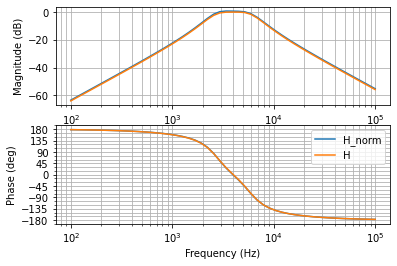

<Figure size 36000x36000 with 0 Axes>

In [139]:
ctl.bode(G_NORM_1*G_NORM_2, dB=True, label='H_norm')
ctl.bode(G, dB=True, label='H')
plt.legend()
plt.figure(figsize=(500,500))
plt.show()

/home/rodrigo/python-virtual-environments/adc/lib/python3.6/site-packages/scipy/sparse/linalg/matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.46465e-24): result may not be accurate.
  return solve(Q, P)
/home/rodrigo/python-virtual-environments/adc/lib/python3.6/site-packages/scipy/sparse/linalg/matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.68406e-24): result may not be accurate.
  return solve(Q, P)


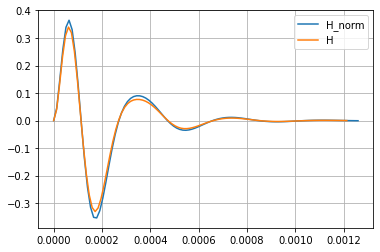

In [142]:
yout, T = ml.step(G_NORM_1*G_NORM_2)
plt.plot(T,yout, label='H_norm')
yout, T = ml.step(G)
plt.plot(T,yout, label='H')
plt.legend()
plt.grid()
plt.show()

# Fracciones simples

In [26]:
G


                        6.317e+08 s^2
------------------------------------------------------------
s^4 + 3.554e+04 s^3 + 1.895e+09 s^2 + 2.245e+13 s + 3.99e+17

In [30]:
apart(G)


                        6.317e+08 s^2
------------------------------------------------------------
s^4 + 3.554e+04 s^3 + 1.895e+09 s^2 + 2.245e+13 s + 3.99e+17

In [33]:
s = symbols('s')

In [37]:
num = (6.317*(10**8)*s)
num

631700000.0*s

In [40]:
den = (s**4) + ((3.554)*(10**4)*(s**3)) + ((1.895)*(10**9)*(s**2)) + (2.245*(10**13)*s) + (3.99*(10**17))
den

s**4 + 35540.0*s**3 + 1895000000.0*s**2 + 22450000000000.0*s + 3.99e+17

In [71]:
import sympy as sym

In [73]:
t = sym.Symbol('t')

In [74]:
uH = sym.Heaviside(t)

In [78]:
sym.inverse_laplace_transform(num/den, s, t)

KeyboardInterrupt: 